![codebasics - What is feature engineering Feature Engineering Tutorial Python # 1 [pYVScuY-GPk - 945x532 - 0m31s].png](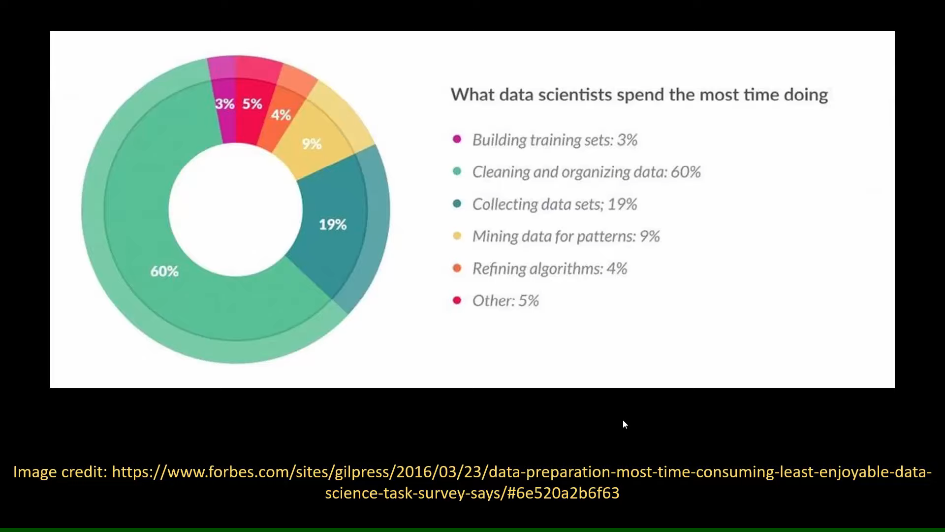)

![codebasics - What is feature engineering Feature Engineering Tutorial Python # 1 [pYVScuY-GPk - 945x532 - 1m02s].png](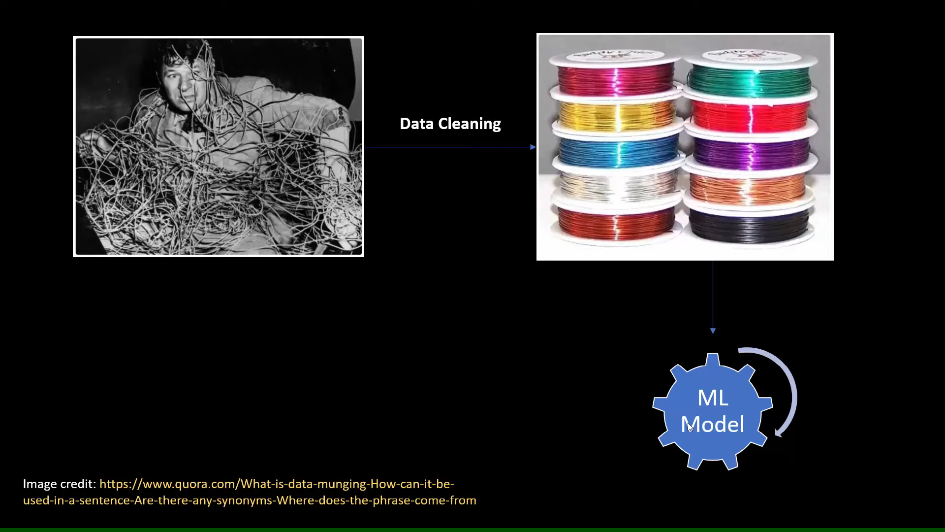)

![codebasics - What is feature engineering Feature Engineering Tutorial Python # 1 [pYVScuY-GPk - 945x532 - 2m20s].png](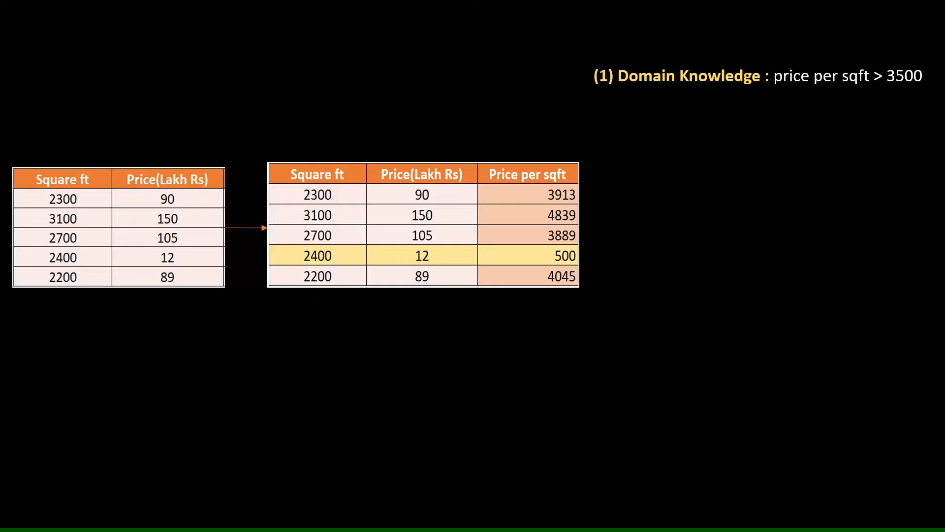)

![codebasics - What is feature engineering Feature Engineering Tutorial Python # 1 [pYVScuY-GPk - 945x532 - 2m25s].png](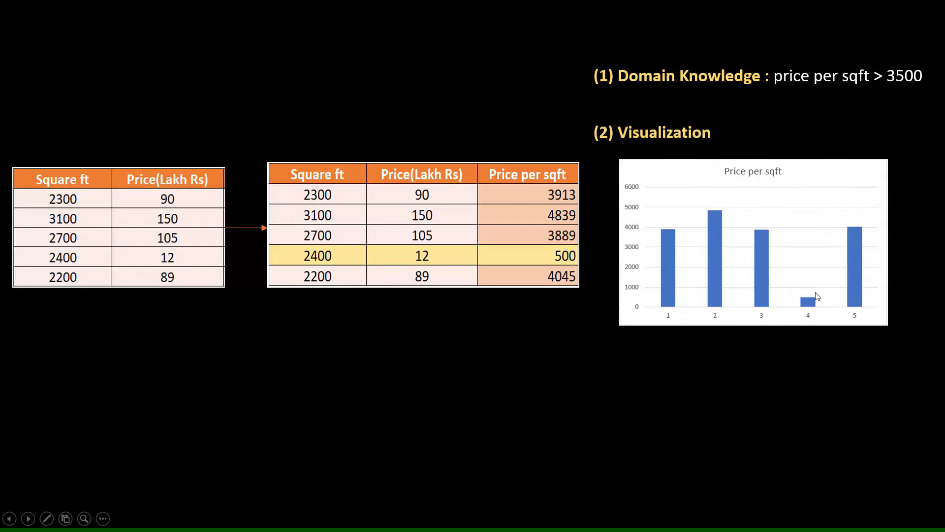)

![codebasics - What is feature engineering Feature Engineering Tutorial Python # 1 [pYVScuY-GPk - 945x532 - 2m49s].png](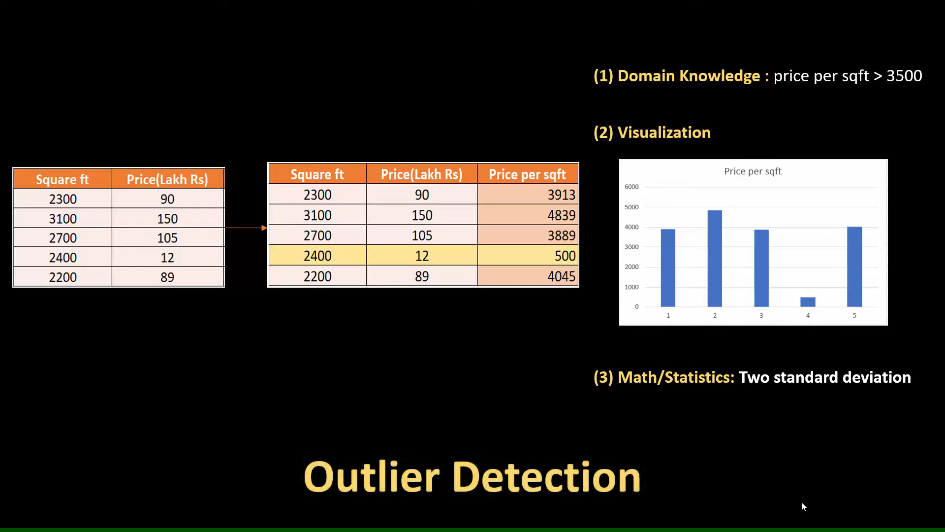)

![codebasics - What is feature engineering Feature Engineering Tutorial Python # 1 [pYVScuY-GPk - 945x532 - 3m18s].png](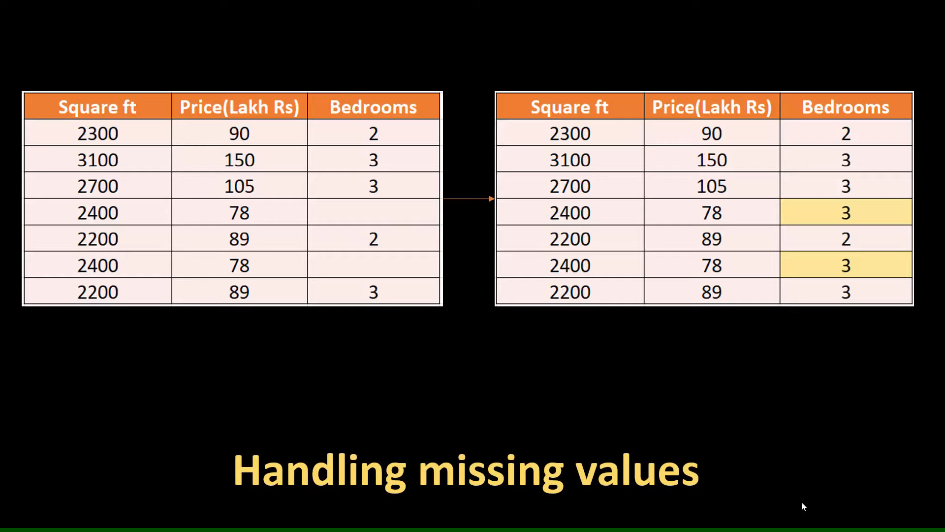)

![codebasics - What is feature engineering Feature Engineering Tutorial Python # 1 [pYVScuY-GPk - 945x532 - 4m05s].png](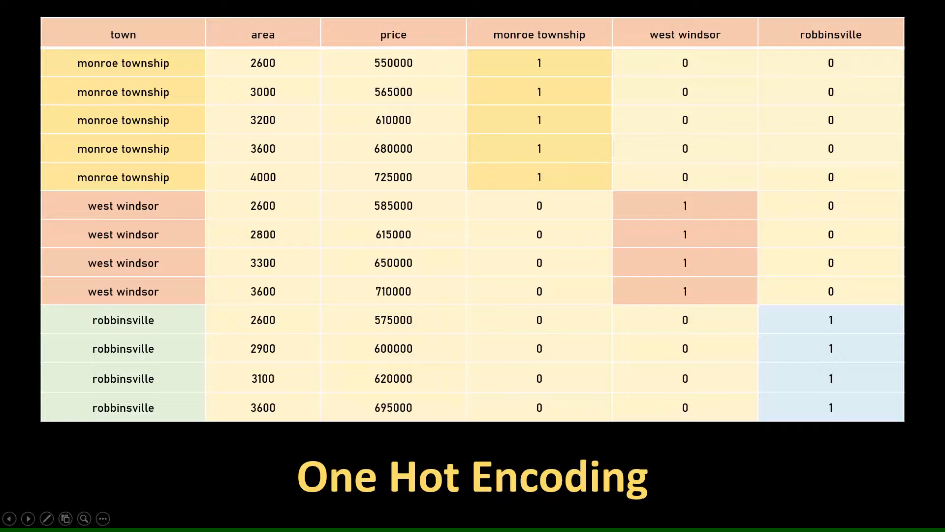)

![codebasics - What is feature engineering Feature Engineering Tutorial Python # 1 [pYVScuY-GPk - 945x532 - 4m17s].png](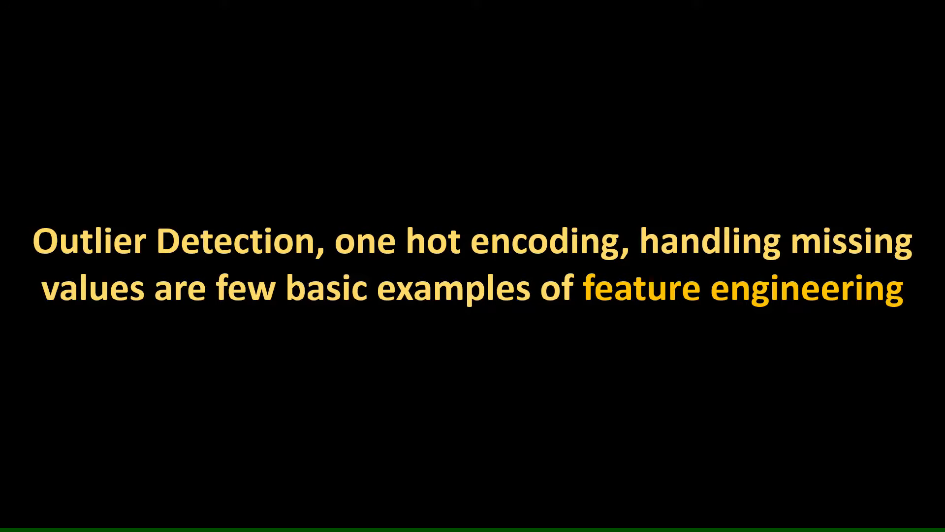)

![codebasics - What is feature engineering Feature Engineering Tutorial Python # 1 [pYVScuY-GPk - 945x532 - 4m28s].png](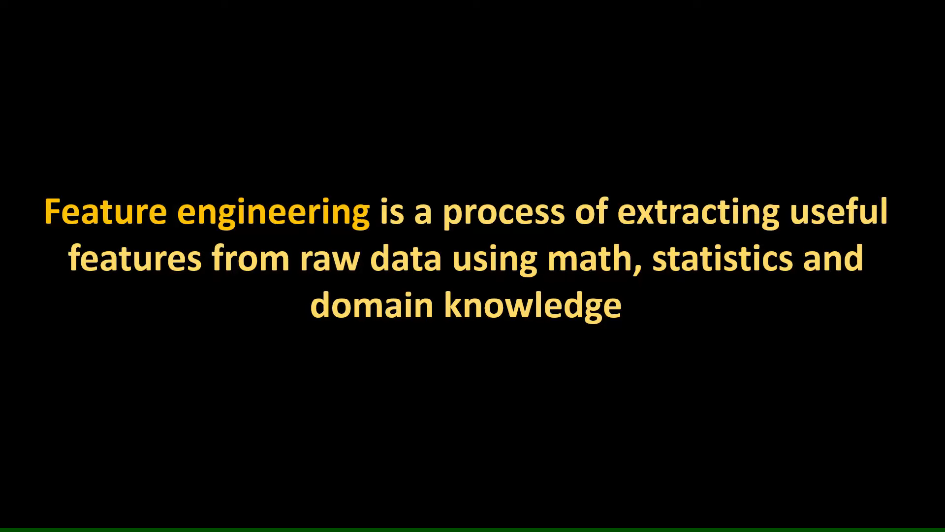)

# Outlier detection and removal using percentile | Feature engineering tutorial python # 2

Percentile 100 is x => 100 % ppl below that mark(x).

Percentile 50 is y => 50 % ppl are below y mark.

![codebasics - Outlier detection and removal using percentile Feature engineering tutorial python # 2 [7sJaRHF03K8 - 945x532 - 3m34s].png](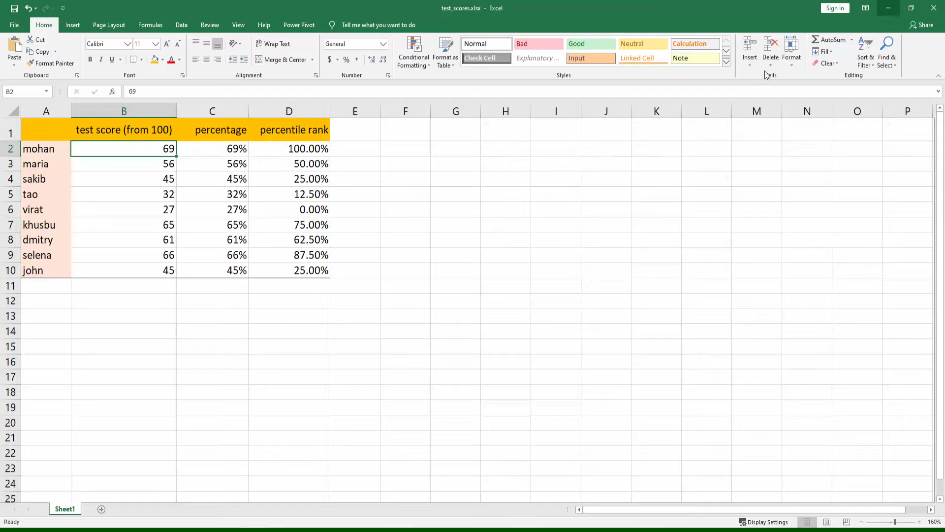)

In [1]:
import pandas as pd

df = pd.read_csv("heights.csv")

In [2]:
df

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
9,imran,14.5


Using percentile feature of the pandas dataframe.

In [3]:
df['height'].quantile(0.95)

9.689999999999998

means 9.6899 is the 95 percentile. Means 95% data points are below 9.6899

Anything abouve this, can be considered as outlier.

This is not a fixed thresold. It varies case to case.

In [4]:
max_thresold = df['height'].quantile(0.95)

In [7]:
df[ df['height'] > max_thresold ]

,name,height
9,imran,14.5


We can also detect outlier by setting min thresold



In [8]:
min_thresold = df['height'].quantile(0.05)
min_thresold

3.6050000000000004

In [9]:
df[ df['height'] < min_thresold ]

,name,height
12,yoseph,1.2


For an adult it may be very less. So it is an outlier.

Now if you have domain knowledge. Outliers detection becomes easier.

For eg : for an adult, the max height can be assumed as  around 7.5 feet. Even if I don't want to use quantile, we can directly say remove those samples whose height is abobe 7.5 feet.



But the problem is we cannot have such good domain knowledge when deeling with multiple features and samples.

In [10]:
df[(df['height']<max_thresold) & (df['height']>min_thresold)]

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1


so 95 percentile se upar and 5 percentile se neeche ke samples have been removed.

This is also can be said as medain ke +45 % and -45 % datapoints we have taken, and upar se 5% and neeche se 5% datapoints we have removed.

## Now complex dataset.

House pricing ddaataset from the kaggle.

In [11]:
df = pd.read_csv("bhp.csv")
df.head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [12]:
df.shape


(13200, 7)

In [13]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [16]:
min_thresold, max_thresold = df.price_per_sqft.quantile([0.001,0.999])
min_thresold, max_thresold # 1 percentile and 99 perccentile values

(1366.184, 50959.36200000098)

let's see what datapoints have very less value

In [17]:
df[df.price_per_sqft < min_thresold ]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
5343,other,9 BHK,42000.0,8.0,175.0,9,416
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875


these are outliers.

In [19]:
df[df.price_per_sqft > max_thresold ]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
7012,other,1 BHK,650.0,1.0,500.0,1,76923
7575,other,1 BHK,425.0,1.0,750.0,1,176470
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150


these are outliers

These kind of data points really hurts the performance of the model

# Explore samples that are above 99.90% percentile and below 1% percentile rank

In [20]:
min_thresold, max_thresold = df.price_per_sqft.quantile([0.001, 0.999])
min_thresold, max_thresold

(1366.184, 50959.36200000098)

In [21]:
df[df.price_per_sqft < min_thresold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
5343,other,9 BHK,42000.0,8.0,175.0,9,416
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875


In [22]:
df[df.price_per_sqft > max_thresold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
7012,other,1 BHK,650.0,1.0,500.0,1,76923
7575,other,1 BHK,425.0,1.0,750.0,1,176470
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150


Remove outliers

In [25]:
df2 = df[(df.price_per_sqft < max_thresold) & (df.price_per_sqft > min_thresold)]
df2.shape

(13172, 7)

In [26]:
df2.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13172.000000,13172.000000,13172.000000,13172.000000,13172.000000
mean,1537.861049,2.690100,111.591865,2.799651,6663.653735
std,967.123711,1.337026,145.372047,1.291130,4141.020700
min,250.000000,1.000000,8.000000,1.000000,1379.000000
25%,1100.000000,2.000000,50.000000,2.000000,4271.000000
50%,1274.500000,2.000000,71.550000,3.000000,5438.000000
75%,1670.000000,3.000000,120.000000,3.000000,7311.000000
max,30400.000000,40.000000,3600.000000,43.000000,50349.000000


In [28]:
df2.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7422,Uttarahalli,3 BHK,1350.0,2.0,47.24,3,3499
7974,Banashankari,2 BHK,1330.0,2.0,77.00,2,5789
12073,Banaswadi,2 BHK,1105.0,2.0,57.00,2,5158
8390,Electronics City Phase 1,2 BHK,865.0,2.0,40.00,2,4624
12125,other,2 BHK,1190.0,2.0,48.00,2,4033
6208,Thanisandra,3 BHK,2172.0,3.0,76.02,3,3500
19,other,2 BHK,1100.0,2.0,48.00,2,4363
8062,Laggere,1 Bedroom,620.0,2.0,48.00,1,7741
10003,Marathahalli,2 BHK,1144.0,2.0,65.00,2,5681
7662,8th Phase JP Nagar,2 BHK,1100.0,2.0,35.00,2,3181


# Outlier detection and removal: z score, standard deviation | Feature engineering tutorial python # 3

In [9]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10,6)

In [6]:
df=pd.read_csv("/content/heights(2).csv")
df.sample(5)

,gender,height
6452,Female,64.082865
821,Male,73.501840
8199,Female,65.643281
4038,Male,65.348590
2929,Male,70.451585


In [7]:
df.shape

(10000, 2)

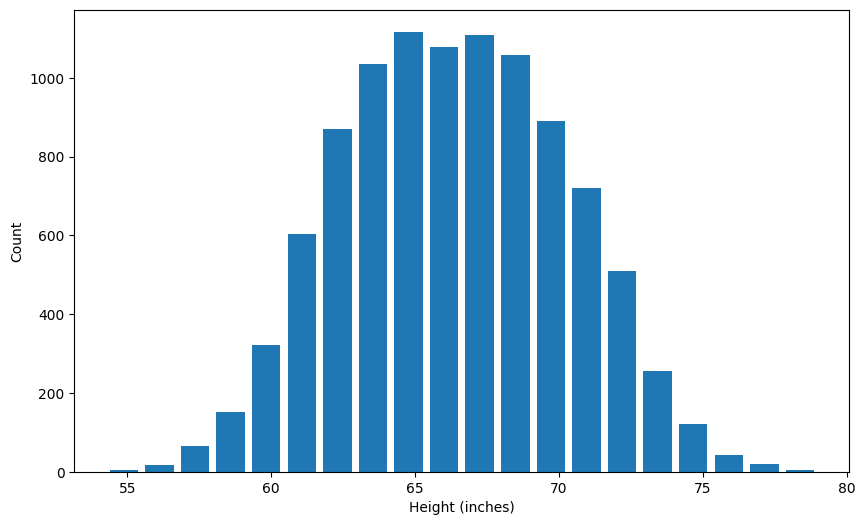

In [8]:
plt.hist(df.height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

Clearly this histogram shows normal distribution in heights of individuals.

It means that majority of the values are centered around the mean.

In [10]:
df.height.min()

54.26313333

In [11]:
df.height.max()

78.99874235

In [12]:
df.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


Ploting the bell curve for the visualization purpose

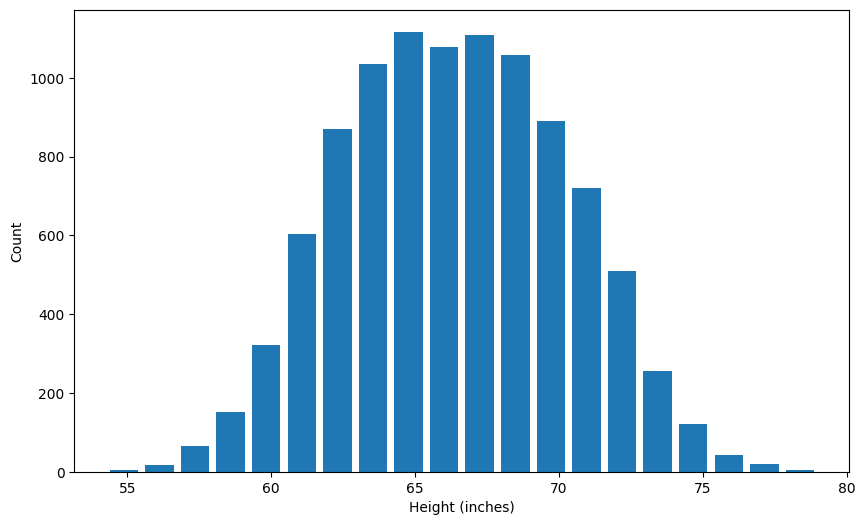

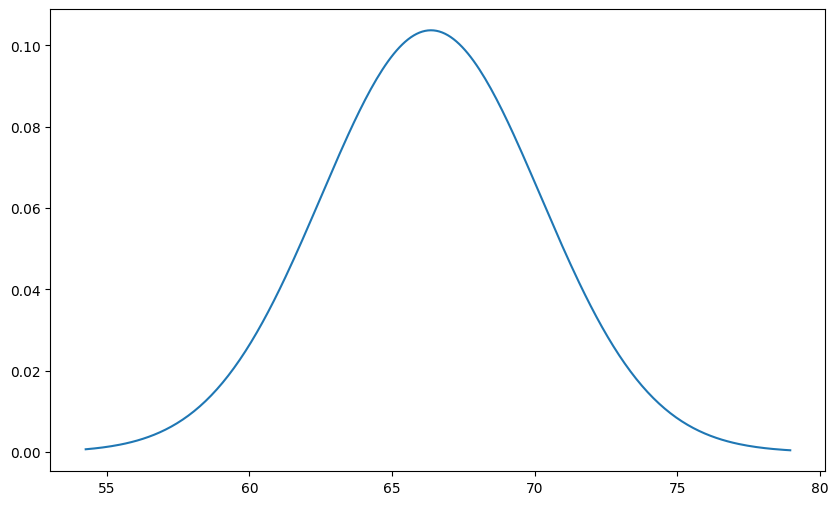

In [13]:
# for plotting the hidtogram
plt.hist(df.height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

# for plotting the bell curve
from scipy.stats import norm
rng = np.arange(df.height.min(),df.height.max(),0.1) # produces range of x values
plt.plot(rng, norm.pdf(rng, df.height.mean(), df.height.std()))

Aaayenn, ye alag alag kyon bn gya

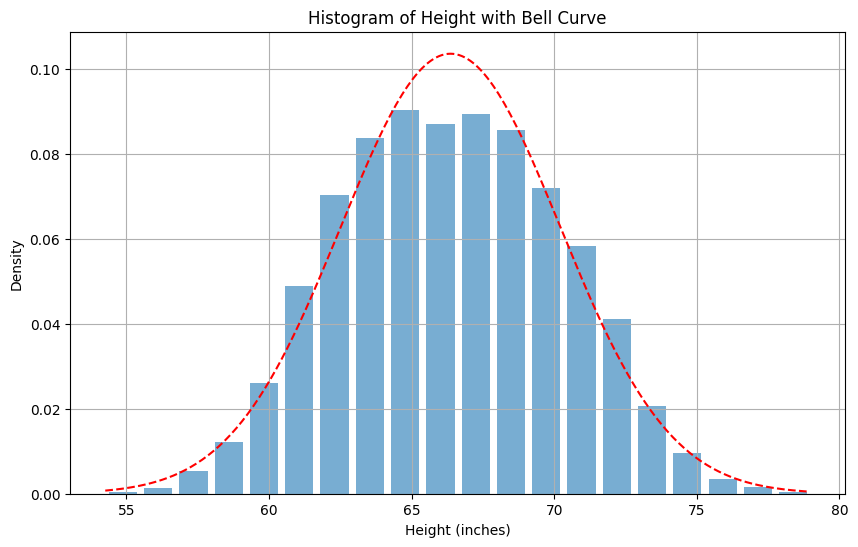

In [25]:
from scipy.stats import norm

# Plot the histogram
plt.hist(df.height, bins=20, rwidth=0.8, density=True, alpha=0.6)  # Set alpha to make the histogram slightly transparent
plt.xlabel('Height (inches)')
plt.ylabel('Density')  # Change ylabel to 'Density' as it's now a density plot
plt.title('Histogram of Height with Bell Curve')
plt.grid(True)

# Plot the bell curve (PDF)
rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng, df.height.mean(), df.height.std()), 'r--')  # Plot bell curve in red dashes

plt.show()

In [14]:
df.height.mean()

66.367559754866

In [15]:
df.height.std()

3.847528120795573

![codebasics - Outlier detection and removal z score, standard deviation Feature engineering tutorial python # 3 [KFuEAGR3HS4 - 995x560 - 7m09s].png](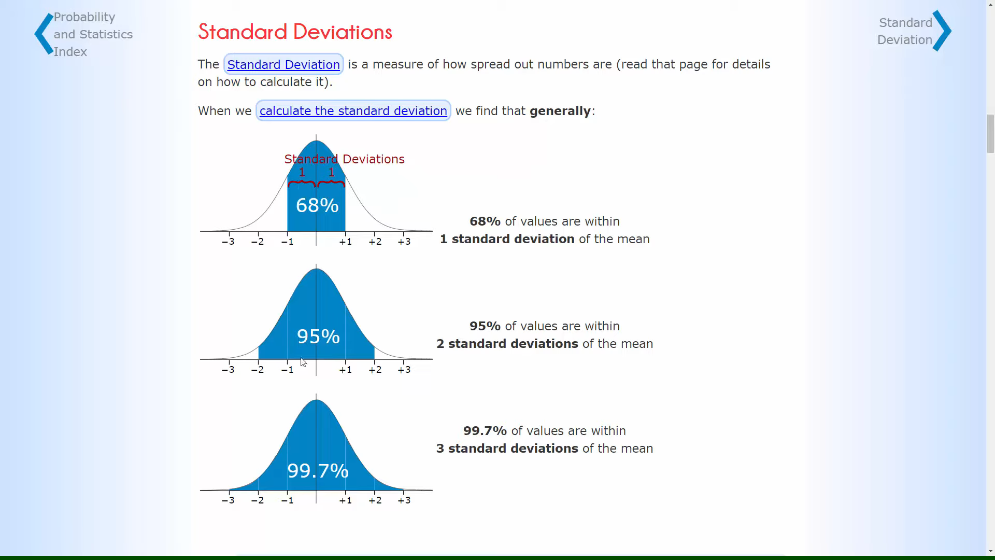)

How many std + - from the mean you want to keep. = let's say we chose +- 3 std. Uske bahar vale will be outliers.

In [16]:
upper_limit = df.height.mean() + 3*df.height.std()
upper_limit

77.91014411725271

In [18]:
lower_limit = df.height.mean() - 3*df.height.std()
lower_limit

54.824975392479274

In [19]:
# let's see how many outliers are there

df[(df.height > upper_limit) | (df.height < lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


So there are 7 data points, which will be outliers, as per our assumption of + - 3 std.

In [20]:
df[(df.height < upper_limit) & (df.height > lower_limit)]

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [21]:
df_no_outlier_std_dev = df[(df.height < upper_limit) & (df.height > lower_limit)]

In [22]:
df_no_outlier_std_dev.shape

(9993, 2)

In [26]:
df.shape[0]

10000

In [27]:
df_no_outlier_std_dev.shape[0]

9993


## (2) Outlier detection and removal using Z Score

Z score is a way to achieve same thing that we did above in part (1)

**Z score indicates how many standard deviation away a data point is.**

For example in our case mean is 66.37 and standard deviation is 3.84.

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)




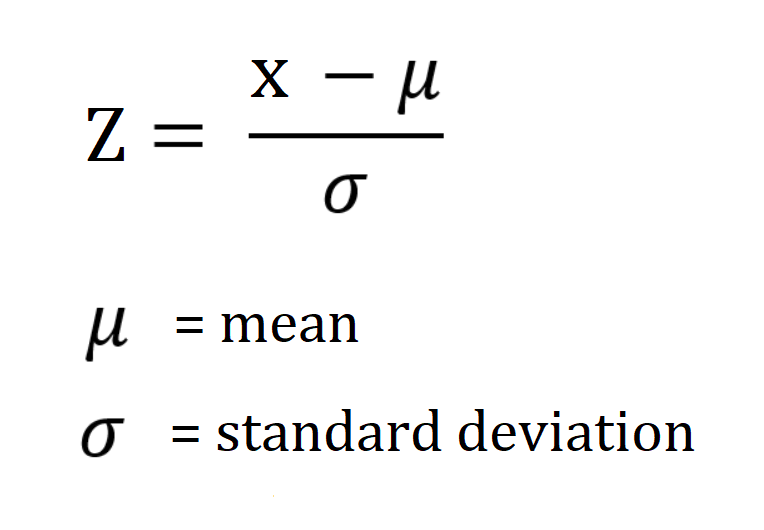

z-score = how many std you are away from the mean.

In [30]:
df['zscore'] = (df.height - df.height.mean())/df.height.std()
# will add one more column of z-score of each of the data-points

In [31]:
df.head(5)

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


z-score 3 means 3 std, 1 means 1 std.

So z-score is just an alternate way of doing the same thing we have done before, to keep only +- 3 std values.

In [32]:
df[df.zscore>3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [34]:
df[df['zscore']<-3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


remember zscore of the mean = 0.

so total 7 outliers we detected again here.

In [35]:
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]

In [36]:
df_no_outliers.shape

(9993, 3)

In [37]:
df_no_outliers.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


# Outlier detection and removal using IQR | Feature engineering tutorial python #

![codebasics - Outlier detection and removal using IQR Feature engineering tutorial python # 4 [A3gClkblXK8 - 995x560 - 1m07s].png](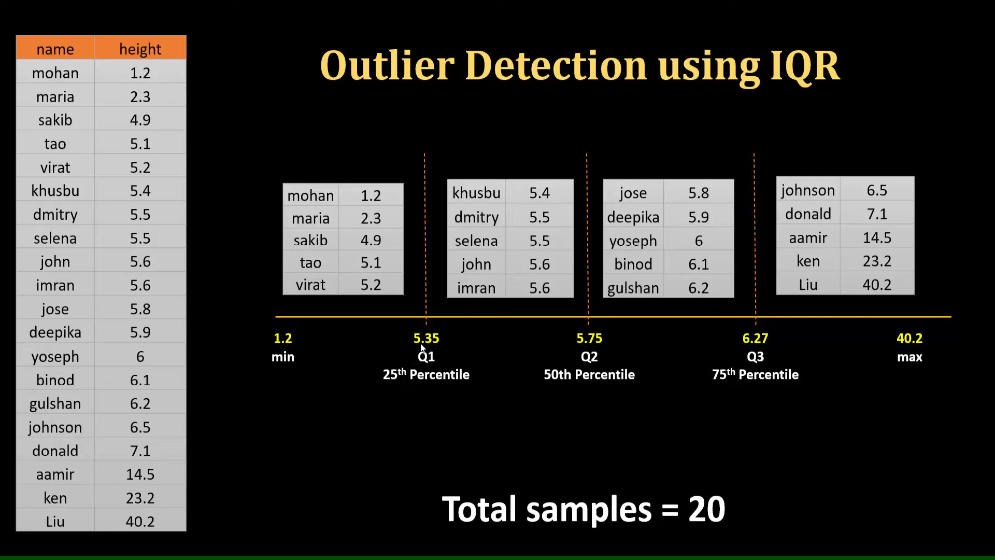)

Maximum value is called 100 percentile and the minimum value is called 0th percentile.

![codebasics - Outlier detection and removal using IQR Feature engineering tutorial python # 4 [A3gClkblXK8 - 995x560 - 2m49s].png](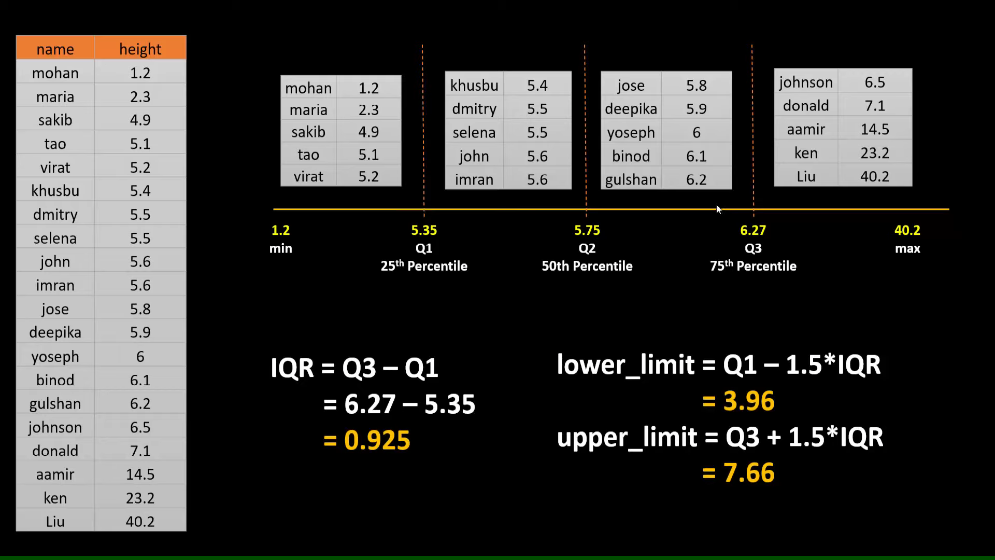)

So any value below lower limit or above upper limit can be called as outliers

![codebasics - Outlier detection and removal using IQR Feature engineering tutorial python # 4 [A3gClkblXK8 - 995x560 - 3m28s].png](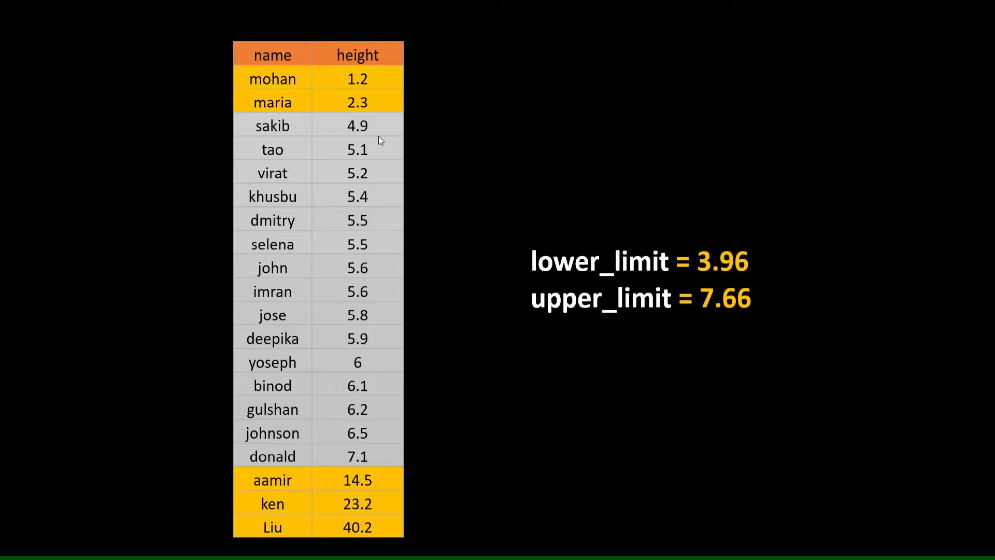)

In [39]:
import pandas as pd
df = pd.read_csv("heights(3).csv")
df

,name,height
0,mohan,1.2
1,maria,2.3
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6


In [40]:
df.describe()

,height
count,20.000000
mean,8.390000
std,8.782812
min,1.200000
25%,5.350000
50%,5.700000
75%,6.275000
max,40.200000


Q1 AND Q2 upar hai fir bhi

In [42]:
Q1 = df.height.quantile(0.25)
Q3 = df.height.quantile(0.75)
Q1, Q3

(5.3500000000000005, 6.275)

In [43]:
IQR = Q3 - Q1

In [44]:
IQR

0.9249999999999998

In [45]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

lower_limit, upper_limit

(3.962500000000001, 7.6625)

In [46]:
df[(df.height < lower_limit) | (df.height > upper_limit)] # these are my outliers

,name,height
0,mohan,1.2
1,maria,2.3
17,aamir,14.5
18,ken,23.2
19,Liu,40.2


In [50]:
df_no_outliers = df[(df.height > lower_limit) & (df.height < upper_limit)]

In [51]:
df_no_outliers, df_no_outliers.shape

(       name  height
 2     sakib     4.9
 3       tao     5.1
 4     virat     5.2
 5    khusbu     5.4
 6    dmitry     5.5
 7    selena     5.5
 8      john     5.6
 9     imran     5.6
 10     jose     5.8
 11  deepika     5.9
 12   yoseph     6.0
 13    binod     6.1
 14  gulshan     6.2
 15  johnson     6.5
 16   donald     7.1,
 (15, 2))